In [1]:
from pathlib import Path
import glob

import numpy as np
import matplotlib.pyplot as plt
from pymeasure.experiment import Results, Parameter

from lib import config
from Scripts.IVg import IVg

05:33:19 AM: Set up console logging (lib, INFO)
05:33:19 AM: Set up file logging (lib, INFO)
05:33:19 AM: Using config file: ./config/config.ini (lib, INFO)


In [2]:
# Read all csv files in the data folder and subfolders
DataDir = Path(config['Filename']['directory'])
DataDir = Path(r'N:\\Other computers\\Mi portátil\\data')
data_files = glob.glob(str(DataDir/'**'/'IVg*.csv'), recursive=True)
results = [Results.load(path, procedure_class=IVg) for path in data_files]
if not results: raise ValueError('No data files found in ' + DataDir)

In [10]:
def filter_by_param(results: list[Results], param: str, value):
    """Filter results by a parameter and value.
    """
    return [r for r in results if r.parameters[param].value == value]

def filter_by(results: list[Results], func: callable):
    """Filter results by a function.
    """
    return [r for r in results if func(r)]

def plot(result: Results, **kwargs):
    """Plot the results of a single IVg measurement.
    """
    fig, ax = plt.subplots()
    result.data.plot(x='Vg (V)', y='I (A)', ax=ax, **kwargs)
    ax.set_title(result.procedure.__class__.__name__)
    ax.set_xlabel('Vg (V)')
    ax.set_ylabel('I (A)')
    #ax.legend()
    return fig, ax

In [14]:
filter_by_param(results, 'vds', 0.075)[0]._data.shape

(1501, 2)

<Axes: xlabel='Vg (V)'>

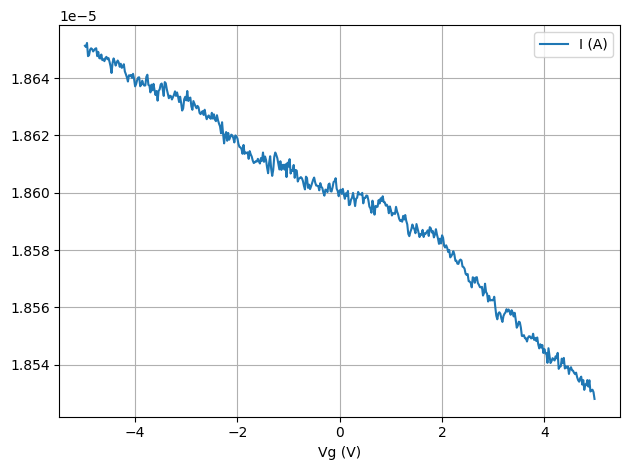

In [6]:
# select main part of the IVg measurement
res = results[1]
Vg_ = res.data[:len(res.data)//2]
Vg_[np.diff(Vg_['Vg (V)'], prepend=0.) > 0].plot(x='Vg (V)', y='I (A)')